In [ ]:
#term project

image_size=(150,150)

def load_data():
    datasets=['train','test']
    output=[]

    for dataset in datasets:

        images=[]
        labels=[]

        print("loading{}".format(dataset))

        for folder in os.listdir(dataset):
            label=class_name_label[folder]

            for file in tqdm(os.listdir(os.path.join(dataset,folder)))


In [ ]:
import cv2
import numpy as np

IMAGE_SIZE = (150, 150)

def listdir_no_os(path):
    # Returns a list of files and directories in the given path
    try:
        return [path + '/' + f for f in open(path).read().split('\n') if f]
    except:
        return []

def isdir_no_os(path):
    # Checks if the given path is a directory
    try:
        open(path + '/')
        return True
    except:
        return False

def load_data(base_dir):
    datasets = ['train', 'test']
    output = []

    # Iterate through training and test sets
    for dataset in datasets:
        images = []
        labels = []

        print(f"Loading {dataset}")
        dataset_path = f"{base_dir}/{dataset}"

        # Iterate through each folder corresponding to a category
        for folder in listdir_no_os(dataset_path):
            if not isdir_no_os(folder):
                continue
            label = int(folder.split('/')[-1])  # Assuming folder names are integers representing labels

            # Iterate through each image in the folder
            for file in listdir_no_os(folder):
                if isdir_no_os(file):
                    continue

                # Open and resize the img
                image = cv2.imread(file)
                if image is None:
                    print(f"Failed to load image: {file}")
                    continue
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype='float32')
        labels = np.array(labels, dtype='int32')
        output.append((images, labels))

    return output


# Example usage:
# base_dir = 'data'
# data = load_data(base_dir)
# train_images, train_labels = data[0]
# test_images, test_labels = data[1]


In [70]:
#최종

import cv2
import numpy as np

IMAGE_SIZE = (150, 150)

# 디렉토리 내의 파일 및 디렉토리 목록을 반환하는 함수
def listdir_no_os(path):
    from os import listdir
    from os.path import join
    try:
        return [join(path, f) for f in listdir(path)]
    except Exception as e:
        print(f"Error reading directory {path}: {e}")
        return []

# 주어진 경로가 디렉토리인지 확인하는 함수
def isdir_no_os(path):
    from os.path import isdir
    return isdir(path)

# 이미지를 로드하고, 각 이미지와 해당 레이블을 반환하는 함수
def load_data(base_dir):
    images = []
    labels = []
    class_names = {}

    # 베이스 디렉토리의 각 폴더를 순회합니다.
    for folder in listdir_no_os(base_dir):
        if not isdir_no_os(folder):
            continue
        class_name = folder.split('/')[-1]
        if class_name not in class_names:
            class_names[class_name] = len(class_names)  # 폴더 이름을 정수 레이블로 매핑

        label = class_names[class_name]

        # 폴더 내의 각 이미지를 순회합니다.
        for file in listdir_no_os(folder):
            if isdir_no_os(file):
                continue

            # 이미지를 열고 크기를 조정합니다.
            image = cv2.imread(file)
            if image is None:
                print(f"Failed to load image: {file}")
                continue
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, IMAGE_SIZE)

            # 이미지와 해당 레이블을 리스트에 추가합니다.
            images.append(image)
            labels.append(label)

    images = np.array(images, dtype='float32')
    labels = np.array(labels, dtype='int32')
    
    return images, labels


base_dir = 'train'
images, labels = load_data(base_dir)




In [ ]:
# 각 특성별로 최대값 찾기
max_values = np.max(images, axis=(0, 1, 2))  # 각 차원의 최대값

# 최대값으로 나누어 최대값을 1로 만들기
normalized_data = images / max_values

print(normalized_data.shape)



In [71]:
# import numpy as np

# IMAGE_SIZE = (150, 150)

# # 디렉토리 내의 파일 및 디렉토리 목록을 반환하는 함수
# def listdir_no_os(path):
#     from os import listdir
#     from os.path import join
#     try:
#         return [join(path, f) for f in listdir(path)]
#     except Exception as e:
#         print(f"Error reading directory {path}: {e}")
#         return []

# # 주어진 경로가 디렉토리인지 확인하는 함수
# def isdir_no_os(path):
#     from os.path import isdir
#     return isdir(path)

# # 이미지를 로드하고, 각 이미지와 해당 레이블을 반환하는 함수
# def load_data(base_dir):
#     images = []
#     labels = []
#     class_names = {}

#     # 베이스 디렉토리의 각 폴더를 순회합니다.
#     for folder in listdir_no_os(base_dir):
#         if not isdir_no_os(folder):
#             continue
#         class_name = folder.split('/')[-1]
#         if class_name not in class_names:
#             class_names[class_name] = len(class_names)  # 폴더 이름을 정수 레이블로 매핑

#         label = class_names[class_name]

#         # 폴더 내의 각 이미지를 순회합니다.
#         for file in listdir_no_os(folder):
#             if isdir_no_os(file):
#                 continue

#             # 이미지를 열고 크기를 조정합니다.
#             image = cv2.imread(file)
#             if image is None:
#                 print(f"Failed to load image: {file}")
#                 continue
#             image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#             image = cv2.resize(image, IMAGE_SIZE)

#             # 이미지와 해당 레이블을 리스트에 추가합니다.
#             images.append(image)
#             labels.append(label)

#     images = np.array(images, dtype='float32')
#     labels = np.array(labels, dtype='int32')
    
#     return images, labels, class_names

# 3x3 평균 필터 적용 함수
def apply_average_filter(images):
    padded_images = np.pad(images, ((0, 0), (1, 1), (1, 1), (0, 0)), 'constant', constant_values=0)
    filtered_images = np.zeros_like(images)

    for i in range(1, padded_images.shape[1] - 1):
        for j in range(1, padded_images.shape[2] - 1):
            filtered_images[:, i - 1, j - 1, :] = np.mean(padded_images[:, i - 1:i + 2, j - 1:j + 2, :], axis=(1, 2))

    return filtered_images

filtered_images = apply_average_filter(normalized_data)



# 결과 출력
print("원본 이미지 배열 크기:", images.shape)
print("필터링된 이미지 배열 크기:", filtered_images.shape)

filtered_images[0]


원본 이미지 배열 크기: (200, 150, 150, 3)
필터링된 이미지 배열 크기: (200, 150, 150, 3)


array([[[0.43006536, 0.43006536, 0.42657954],
        [0.64575166, 0.64575166, 0.6405229 ],
        [0.6470588 , 0.6470588 , 0.6418301 ],
        ...,
        [0.64749455, 0.64749455, 0.64575166],
        [0.6466231 , 0.6466231 , 0.6431373 ],
        [0.4305011 , 0.4305011 , 0.42701524]],

       [[0.64444447, 0.64444447, 0.6392157 ],
        [0.96775603, 0.96775603, 0.95991296],
        [0.96949893, 0.96949893, 0.96165586],
        ...,
        [0.97124183, 0.97124183, 0.9686274 ],
        [0.9699347 , 0.9699347 , 0.9647059 ],
        [0.64575166, 0.64575166, 0.6405229 ]],

       [[0.64357305, 0.64357305, 0.6383442 ],
        [0.9664489 , 0.9664489 , 0.95860565],
        [0.9681918 , 0.9681918 , 0.96034867],
        ...,
        [0.97167754, 0.97167754, 0.9690631 ],
        [0.9699347 , 0.9699347 , 0.9647059 ],
        [0.64575166, 0.64575166, 0.6405229 ]],

       ...,

       [[0.1442266 , 0.1416122 , 0.13638344],
        [0.22483662, 0.22091502, 0.21307188],
        [0.25751635, 0

In [73]:
import numpy as np

def augment_data(images, labels):
    augmented_images = []
    augmented_labels = []

    for image, label in zip(images, labels):
        # 원본 이미지와 레이블 추가
        augmented_images.append(image)
        augmented_labels.append(label)

        # 좌우 반전 이미지와 레이블 추가
        flipped_lr = np.fliplr(image)
        augmented_images.append(flipped_lr)
        augmented_labels.append(label)

        # 상하 반전 이미지와 레이블 추가
        flipped_ud = np.flipud(image)
        augmented_images.append(flipped_ud)
        augmented_labels.append(label)

    # numpy 배열로 변환
    augmented_images = np.array(augmented_images, dtype='float32')
    augmented_labels = np.array(augmented_labels, dtype='int32')

    return augmented_images, augmented_labels

# 데이터 로드 및 증강 수행
base_dir = 'train'
images, labels = load_data(base_dir)
augmented_images, augmented_labels = augment_data(images, labels)

# 결과 출력
print("원본 이미지 배열 크기:", images.shape)
print("증강된 이미지 배열 크기:", augmented_images.shape)
print("원본 레이블 배열 크기:", labels.shape)
print("증강된 레이블 배열 크기:", augmented_labels.shape)








원본 이미지 배열 크기: (200, 150, 150, 3)
증강된 이미지 배열 크기: (600, 150, 150, 3)
원본 레이블 배열 크기: (200,)
증강된 레이블 배열 크기: (600,)


In [74]:
def shuffle_data(images, labels):

    
    # 인덱스 배열 생성 및 셔플
    indices = np.arange(len(images))
    np.random.shuffle(indices)

    # 인덱스를 사용해 이미지와 레이블을 셔플
    shuffled_images = images[indices]
    shuffled_labels = labels[indices]

    return shuffled_images, shuffled_labels


pre_data,pre_label=shuffle_data(augmented_images,augmented_labels)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


클래스 이름과 인덱스 매핑:
Class name: train\buildings, Index: 0
Class name: train\forest, Index: 1
Class name: train\glacier, Index: 2
Class name: train\mountain, Index: 3
Class name: train\sea, Index: 4


KeyError: 0

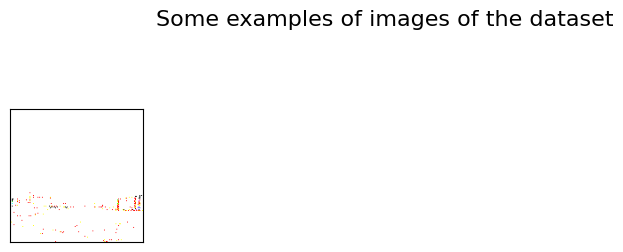

In [69]:
import matplotlib.pyplot as plt

def display_examples(class_names, images, labels):
   
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

# 클래스 이름과 인덱스 확인
print("클래스 이름과 인덱스 매핑:")
for class_name, index in class_names.items():
    print(f"Class name: {class_name}, Index: {index}")

# 전처리된 이미지와 레이블을 출력
display_examples(class_names, augmented_images, augmented_labels)
